### feature standardization improves clustering

In [ ]:
● Variance of a feature measures spread of its values
● In kmeans: feature variance = feature influence
● StandardScaler transforms each feature to have mean 0 and variance 1
● Features are said to be "standardized"

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

In [32]:
%matplotlib inline
plt.interactive(False)

### StandardScaler is a "preprocessing" step

In [ ]:
df1 = pd.read_csv("..\data\wine.csv")
del df1["class_name"]
samples = np.array(df1)

In [ ]:
scaler = StandardScaler()
scaler.fit(samples)
samples_scaled = scaler.transform(samples)

In [ ]:
df = pd.read_csv("..\data\wine.csv", usecols=["class_label","class_name"])
df.head()

In [ ]:
ct = pd.crosstab(df["class_label"],df["class_name"])
print(ct)

In [ ]:
scaler = StandardScaler()
scaler.fit(samples)
StandardScaler(copy=True, with_mean=True, with_std=True)
samples_scaled = scaler.transform(samples)

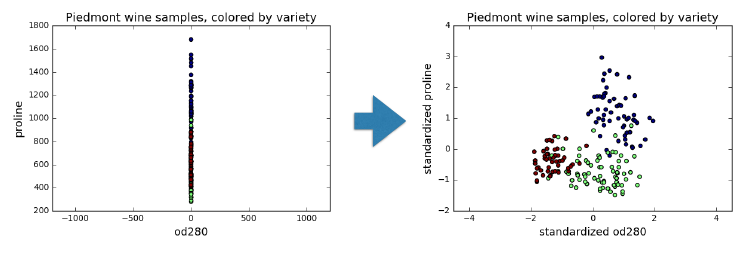

### pipelines combine multiple steps

In [18]:
df1 = pd.read_csv("..\data\samples.csv")
samples = np.array(df1)

In [19]:
# Create scaler
scaler = StandardScaler()
# Create KMeans instance
kmeans = KMeans(n_clusters=4)
# Create pipeline
pipeline = make_pipeline(scaler, kmeans)

In [20]:
# Fit the pipeline to samples
pipeline.fit(samples)
# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

In [23]:
species = ["Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Bream","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Roach","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Smelt","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike","Pike"]

In [24]:
# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame(({'labels': labels, 'species': species}))
# Create crosstab: ct
ct = pd.crosstab(df["labels"],df["species"])
# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            0     0     19      1
3            0    17      0      0


### Normalizer

In [ ]:
- StandardScaler() standardizes features by removing the mean and scaling to unit variance, 
- Normalizer() rescales each sample (each company's stock price) - independently of the other.

In [26]:
df2 = pd.read_csv("..\data\stock-movements.csv")
del df2['COS']
movements = np.array(df2)

In [29]:
# Create a normalizer
normalizer = Normalizer()
# Create a KMeans model with 10 clusters
kmeans = KMeans(n_clusters=10)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [27]:
companies = ['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']

In [30]:
# Predict the cluster labels
labels = pipeline.predict(movements)
# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})
# Display df sorted by cluster label
print(df.sort_values("labels"))

                             companies  labels
30                          MasterCard       0
46                      Sanofi-Aventis       0
52                            Unilever       0
6             British American Tobacco       0
19                     GlaxoSmithKline       0
37                            Novartis       0
45                                Sony       1
22                                  HP       1
21                               Honda       1
48                              Toyota       1
34                          Mitsubishi       1
58                               Xerox       1
15                                Ford       1
7                                Canon       1
13                   DuPont de Nemours       2
44                        Schlumberger       2
57                               Exxon       2
53                       Valero Energy       2
32                                  3M       2
23                                 IBM       2
12           

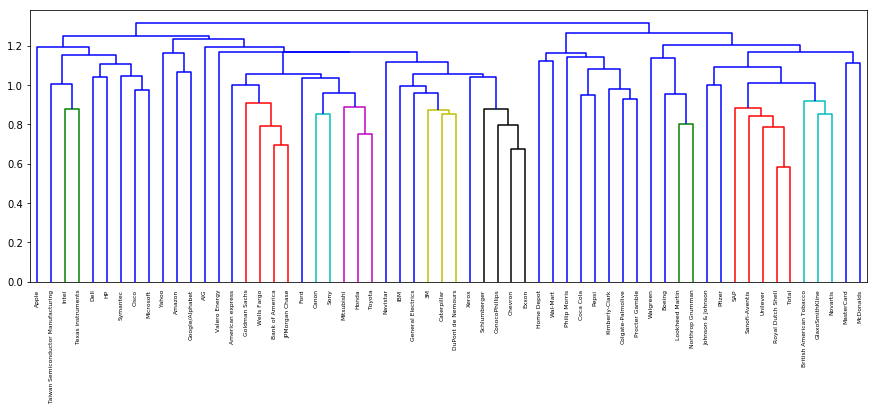

In [33]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')
# Plot the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()

### MaxAbsScaler (another option)